# Adrien HANS & Tanguy JEANNEAU
# EnsLearn - TP n°3

# A rendre pour le 6 janvier

## Exercice 1 : Boosted trees

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier as VC
import seaborn as sns

### Question 1 : 
Reprenez le même dataset qu’au TP n°1 (en fixant à 0 la seed du générateur aléatoire et toujours avec le
paramètre noise fixé à 0.3). Ce dataset est généré par make_moons et contient n = 300 points de données.
Nous ne ferons pas ici de validation croisée

In [4]:
#Génération du dataset :
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=0) #random_state : seed du générateur 

Affichage du dataset :

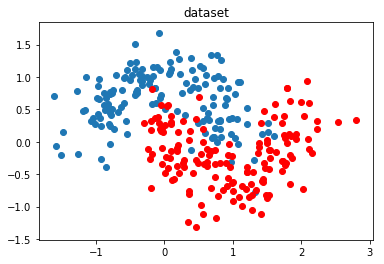

In [6]:
plt.scatter(Y[c==0][:,0], Y[c==0][:,1])
plt.scatter(Y[c==1][:,0], Y[c==1][:,1],color='r')
plt.title('dataset')
plt.show()

## Question 2 : 

Transformez le classifieur faible du TP n°1 ("Bad Tree") en classifieur fort grâce à l’algorithme AdaBoost.
Chaque membre du comité est donc un arbre de décision de profondeur maximale 1 (tree stump) et est une
instance de DecisionTreeClassifier(max_depth=1). On prendra M = 20 classifieurs dans le comité.
Pour qu’un arbre minimise la perte pondérée par les poids $w_m^{(i)}$ d’AdaBoost, vous devrez obtenir un échantillon bootstrap à partir de vos données généré en 1). Cet échantillon s’obtient en tirant au hasard une donnée avec la probabilité: $$p_i=\frac{w_m^{(i)}}{\sum_{i'=1}^nw_m^{(i')}}$$


On pourra utiliser np.random.multinomial à cette fin.

Comment évolue le risque empirique sur les données d’entraînement ?


In [148]:
#Classifieur faible : 
#Arbre de décision de profondeur maximale 1
maxdepth=1
#number of classifiers :
M=20 

def Adaboost(Y,c,maxdepth,M):
    n=len(c)
    weights=np.concatenate((np.array([[1/n]*n]), np.zeros((M,n))),axis=0)
    alpha=[]
    epsilon=[]
    for k in range(1, M+1):
        #Sampler un dataset :
        sum_weights=np.sum(weights[k-1])
        pvals=[(weights[k-1][i])/sum_weights for i in range(n)]
        
        print(np.sum(pvals))
        
        #Il faut prendre la taille = 4*n
        Dboost=np.random.multinomial(n=n,pvals=pvals,size=4).reshape(4*n) 
        Yboost=np.array([Y[i] for i in Dboost]).reshape(4*n,2)
        cboost=[c[i] for i in Dboost]
        #On défnit l'arbre :
        DTC = DecisionTreeClassifier(max_depth=maxdepth)
        #entrainer l'arbre arbre :
        DTC.fit(Yboost,cboost)
        #epsilon:
        epsilon.append(DTC.score(Yboost,cboost))
        #alpha:
        alpha=np.log((1-epsilon[k-1])/epsilon[k-1])
        #Mise à jour du poids : 
        c_pred=DTC.predict(Yboost)
        for i in range(n):
            weights[k][i]=(weights[k-1][i])*np.exp(-0.5*alpha*(2*cboost[i]-1)*(2*c_pred[i]-1))
    return epsilon

Plotting the error rate :

In [149]:
maxdepth=1
M=20
epsilon = Adaboost(Y,c,maxdepth,M)

1.0
nan


C:\Users\adrie\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\adrie\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\adrie\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater_equal


ValueError: pvals < 0, pvals > 1 or pvals contains NaNs

In [ ]:
plt.plot([k for k in range(0,M+1)], epsilon)
plt.xlabel('Iteration')
plt.ylabel('error rate')
plt.title('Error rate with itertation :')
plt.show()

### Question 3 :

Générez un autre dataset de même taille que précédemment mais en changeant la seed. Comment évolue le risque empirique sur ces données de test ?


### question 4 :
Affichez l’évolution du comité au fil des itérations d’AdaBoost ainsi que les arbres successivement appris.

## Exercice 2 : Stacked NBCs